In [12]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure, transform
from skimage.color import rgb2gray

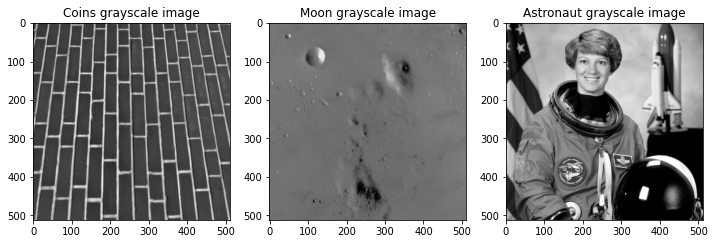

In [13]:
brick = data.brick()
plt.figure(figsize=(12, 5))
plt.subplot(131)
plt.imshow(brick, cmap='gray')
plt.title("Coins grayscale image")

plt.subplot(132)
moon = data.moon()
plt.imshow(moon, cmap='gray')
plt.title("Moon grayscale image")

plt.subplot(133)
astronaut = rgb2gray(data.astronaut())
plt.imshow(astronaut, cmap='gray')
plt.title("Astronaut grayscale image")
plt.show()

Text(0.5, 1.0, 'Contrast adjust')

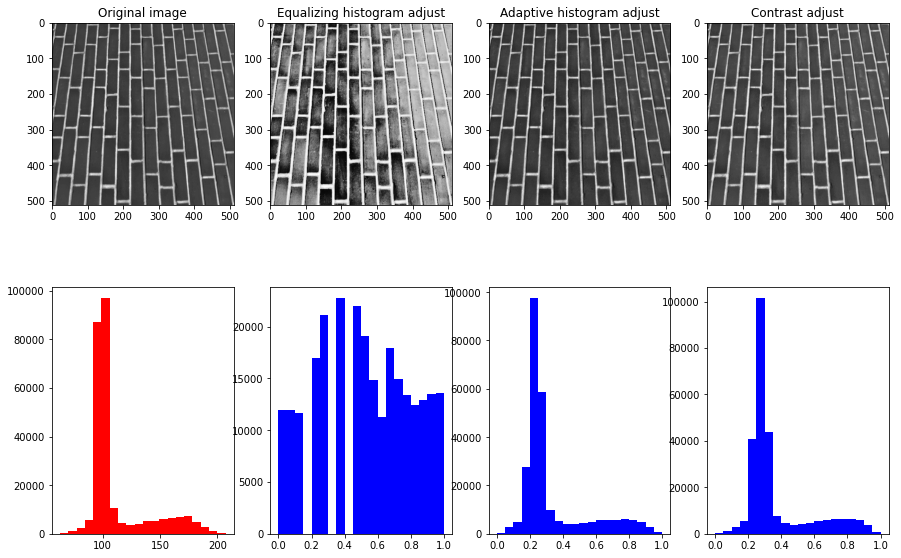

In [14]:
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2,4),dtype=np.object)
axes[0,0] = plt.subplot(2, 4, 1)
axes[0,1] = plt.subplot(2, 4, 2)
axes[0,2] = plt.subplot(2, 4, 3)
axes[0,3] = plt.subplot(2, 4, 4)
axes[1,0] = plt.subplot(2, 4, 5)
axes[1,1] = plt.subplot(2, 4, 6)
axes[1,2] = plt.subplot(2, 4, 7)
axes[1,3] = plt.subplot(2, 4, 8)

axes[0,0].imshow(brick,cmap='gray')
axes[1,0].hist(brick.ravel(), bins=20, histtype='bar', color='red')
axes[0,0].set_title("Original image")

img_eq = exposure.equalize_hist(brick)
axes[0,1].imshow(img_eq,cmap='gray')
axes[1,1].hist(img_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[0,1].set_title("Equalizing histogram adjust")

img_adapt_eq = exposure.equalize_adapthist(brick)
axes[0,2].imshow(img_adapt_eq,cmap='gray')
axes[1,2].hist(img_adapt_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[0,2].set_title("Adaptive histogram adjust")

img_contrast_enhanced = exposure.equalize_adapthist(exposure.adjust_gamma(brick, 0.5))
axes[0,3].imshow(img_contrast_enhanced,cmap='gray')
axes[1,3].hist(img_contrast_enhanced.ravel(), bins=20, histtype='bar', color='blue')
axes[0,3].set_title("Contrast adjust")

Text(0.5, 1.0, 'Contrast adjust')

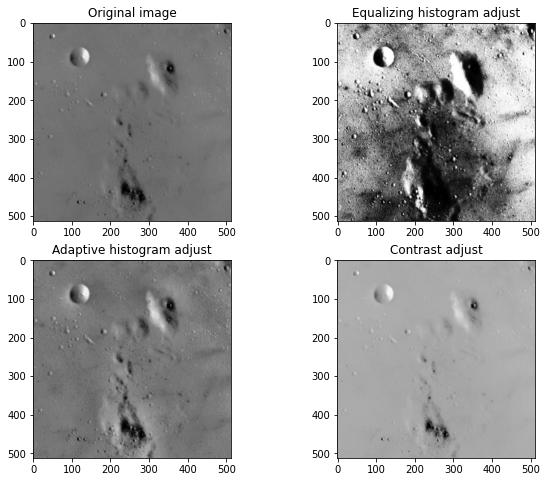

In [15]:
plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.imshow(moon,cmap='gray')
plt.title("Original image")

img_eq = exposure.equalize_hist(moon)
plt.subplot(222)
plt.imshow(img_eq,cmap='gray')
plt.title("Equalizing histogram adjust")

img_adapt_eq = exposure.equalize_adapthist(moon)
plt.subplot(223)
plt.imshow(img_adapt_eq,cmap='gray')
plt.title("Adaptive histogram adjust")

img_contrast_enhanced = exposure.adjust_gamma(moon, 0.5)
plt.subplot(224)
plt.imshow(img_contrast_enhanced,cmap='gray')
plt.title("Contrast adjust")

Text(0.5, 1.0, 'Contrast adjust')

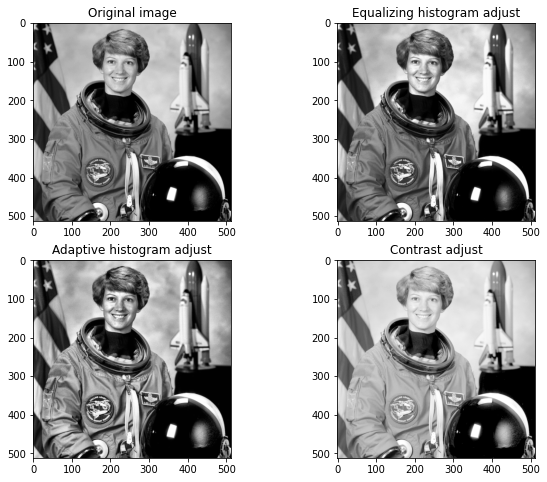

In [16]:
plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.imshow(astronaut,cmap='gray')
plt.title("Original image")

img_eq = exposure.equalize_hist(astronaut)
plt.subplot(222)
plt.imshow(img_eq,cmap='gray')
plt.title("Equalizing histogram adjust")

img_adapt_eq = exposure.equalize_adapthist(astronaut)
plt.subplot(223)
plt.imshow(img_adapt_eq,cmap='gray')
plt.title("Adaptive histogram adjust")

img_contrast_enhanced = exposure.adjust_gamma(astronaut, 0.5)
plt.subplot(224)
plt.imshow(img_contrast_enhanced,cmap='gray')
plt.title("Contrast adjust")

Text(0.5, 1.0, 'Astronaut histogram')

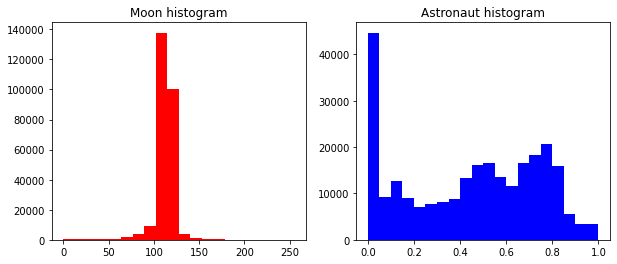

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(moon.ravel(),bins=20,histtype='bar',color='red')
plt.title('Moon histogram')

plt.subplot(122)
plt.hist(astronaut.ravel(),bins=20,histtype='bar',color='blue')
plt.title('Astronaut histogram')

/Users/miroslavuhlar/opt/anaconda3/envs/Cvicenie_3/lib/python3.8/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


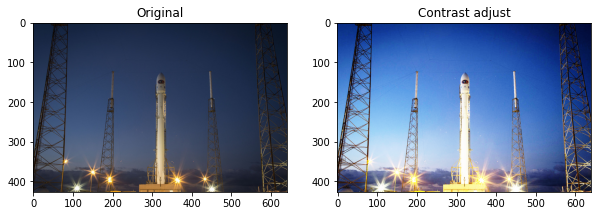

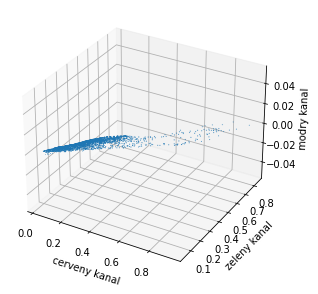

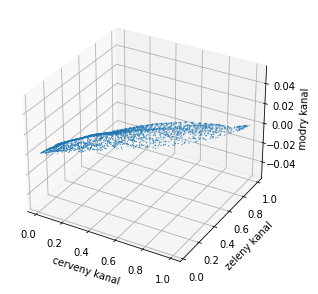

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(data.rocket())
plt.title("Original")

plt.subplot(122)
img_new = exposure.equalize_hist(data.rocket())
plt.imshow(img_new,cmap='gray')
plt.title("Contrast adjust")

shape = np.floor(np.asarray(data.rocket().shape[0:2])/10).astype(dtype=np.int)
shape = np.hstack((shape, 3))
im =  transform.resize(data.rocket(),shape)
im1 = transform.resize(img_new,shape)

plt.figure(figsize=(10, 5))
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]
ax = plt.axes(projection='3d')
ax.set_xlabel('cerveny kanal')
ax.set_ylabel('zeleny kanal')
ax.set_zlabel('modry kanal')

plt.scatter(r.ravel(),g.ravel(),b.ravel(), cmap='viridis', linewidth=0.5)

plt.figure(figsize=(10, 5))
r = im1[:,:,0]
g = im1[:,:,1]
b = im1[:,:,2]
ax = plt.axes(projection='3d')
ax.set_xlabel('cerveny kanal')
ax.set_ylabel('zeleny kanal')
ax.set_zlabel('modry kanal')

plt.scatter(r.ravel(),g.ravel(),b.ravel(), cmap='viridis', linewidth=0.5)

Text(0.5, 1.0, 'Histogram pri upravenej jasovej stupnici')

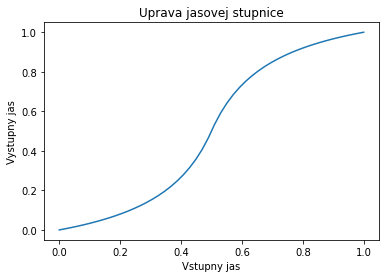

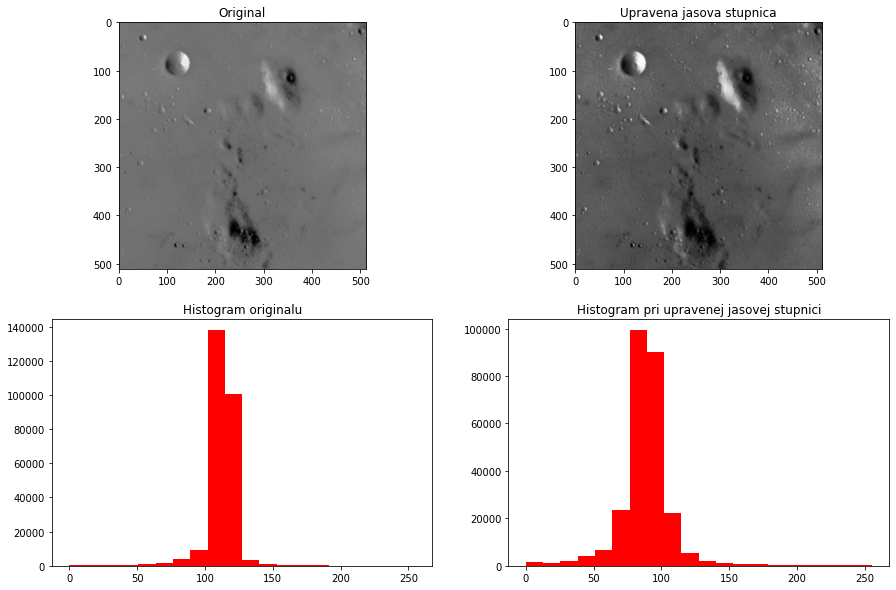

In [19]:
x = np.linspace(0,1,50)
p = 5
c = (0.5*p)/(1+0.5*p)
plt.figure()
y= (((x-0.5)*p)/(1+abs((x-0.5)*p))+c)/(2*c)
plt.plot(x,y)
plt.title('Uprava jasovej stupnice')
plt.xlabel('Vstupny jas')
plt.ylabel('Vystupny jas')

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(data.moon(),cmap='gray')
plt.title("Original")

plt.subplot(222)
im = data.moon()/255
plt.title("Upravena jasova stupnica")
adj_im = (((im-0.5)*p)/(1+abs((im-0.5)*p))+c)/(2*c)
plt.imshow(adj_im,cmap='gray')

plt.subplot(223)
plt.hist(data.moon().ravel(), bins=20, histtype='bar', color='red')
plt.title("Histogram originalu")

plt.subplot(224)
plt.hist((adj_im*255).ravel(), bins=20, histtype='bar', color='red')
plt.title("Histogram pri upravenej jasovej stupnici")

Text(0.5, 1.0, 'Histogram negativu')

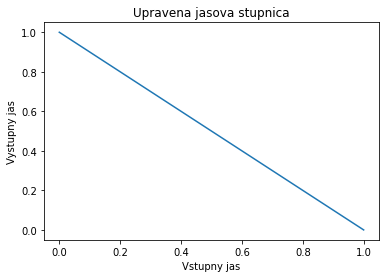

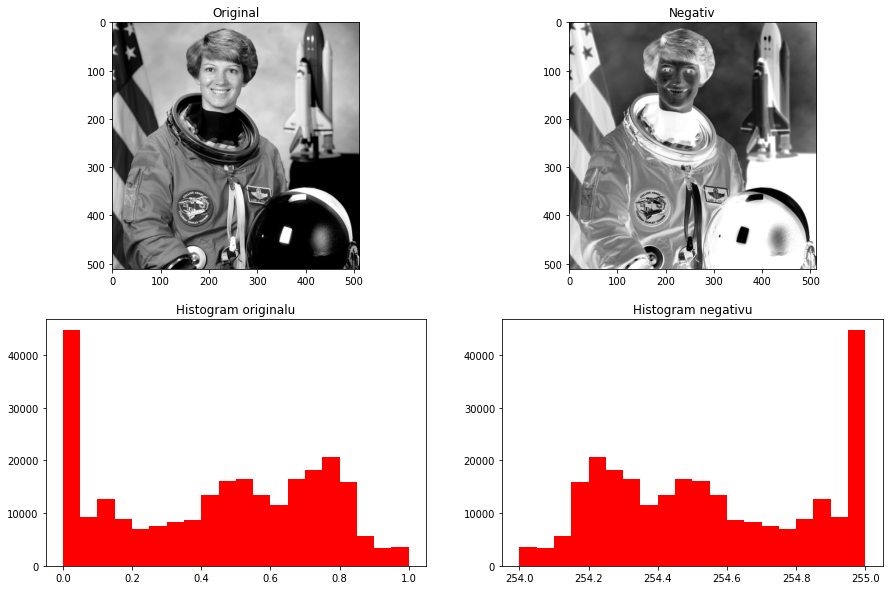

In [20]:
#negativ obrazku
x = np.linspace(0,1,50)
y = 1-x
plt.figure()
plt.plot(x,y)
plt.title("Upravena jasova stupnica")
plt.xlabel('Vstupny jas')
plt.ylabel('Vystupny jas')

picture = data.astronaut()
gray_picture = rgb2gray(picture)
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(gray_picture,cmap='gray')
plt.title("Original")
plt.subplot(223)
plt.hist(gray_picture.ravel(),bins=20,histtype='bar',color='red')
plt.title("Histogram originalu")

negative_image = gray_picture/255
negative_image = 1-negative_image
plt.subplot(222)
plt.imshow(negative_image,cmap='gray')
plt.title("Negativ")
plt.subplot(224)
plt.hist((negative_image*255).ravel(),bins=20,histtype='bar',color='red')
plt.title("Histogram negativu")

In [21]:
#BONUS
#Vypoctajte kolko roznych histogramov existuje pre sedotonovy obrazok (0-255) s rozmermi h * w (+2b)

# kombinacie s opakovanim kde N je mnozina kategorii (256) a K je k-tica prvkov ktore sa mozu opakovat (w*h)
# a teda C' = (N + K - 1, K) = ((256 + (h*w) - 1)!) / ((256 - 1)! * (h*w)!)